In [106]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [71]:
# loading and exploring data
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [72]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [73]:
all_data['Country'].value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

In [74]:
all_data['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

There are 4 columns and 96 rows in the dataframe. There is no missing value. The data is about 6 countries: Chile, China, Germany, Mexico, the USA and Zimbabwe. The timespan covers 15 years: from 2000 to 2015.

### Goals of the Project ###
- Which country has the highest and lowest life expectancy?
- How have the GDP values changed  over the years?
- Is there a relation between GDP and life expectancy?
- Is there a relation between years and life expectancy?

### Tasks ###
1. Cleaning and exploring dataset
    1. The shorting of the name of the Life expectancy column
    2. distribution of GDP
    3. distribution of life expectancy
2. GDP change in each country - line graph
    1. Is there an obvious tendency?
    2. Zooming on countries where increasing tendency is not obvious
3. Life expectancy in each country - line graph
4. Life expectancy and GDP in each country (scatterplot)
5. Heatmap: life expectancy, GDP, years (in general and in each country)

### Cleaning and exploring dataset ###

In [77]:
# rename column 
all_data.rename(columns={'Life expectancy at birth (years)': 'Life_expectancy'}, inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


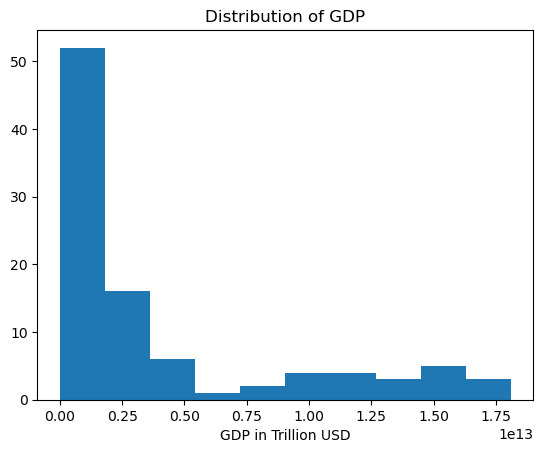

<Figure size 640x480 with 0 Axes>

In [78]:
#distribution of GDP
plt.hist(all_data.GDP)
plt.title('Distribution of GDP')
plt.xlabel('GDP in Trillion USD')
plt.show()
plt.clf()

The data is left-skewed,has a peak at 0.00-025 Trillion of USD, and a long tail over 1.75 Trillion USD.

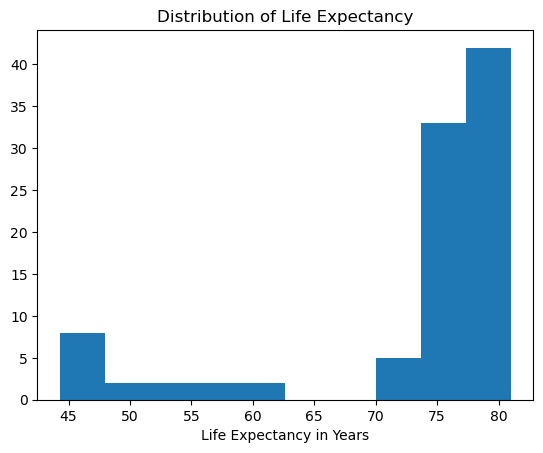

<Figure size 640x480 with 0 Axes>

In [79]:
# distribution of life expectancy
plt.hist(all_data.Life_expectancy)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy in Years')
plt.show()
plt.clf()

In [76]:
all_data['Life expectancy at birth (years)'].min()

44.3

In [75]:
all_data['Life expectancy at birth (years)'].max()

81.0

The distribution is right-skewed, the peak is at 81 years. There are some values at around 44 years which is very low. There is a gap between 63 and 70 years. 

### GDP in each country ###

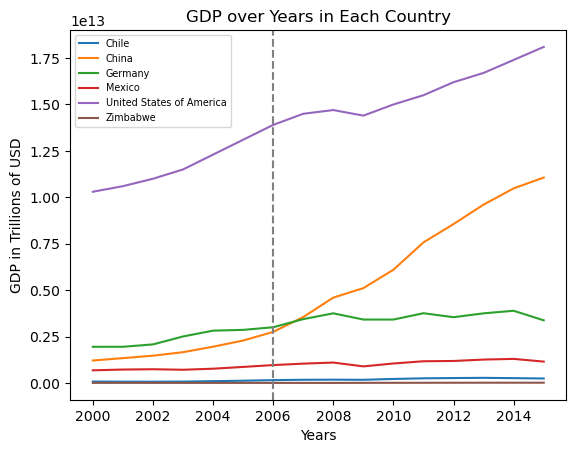

<Figure size 640x480 with 0 Axes>

In [80]:
# GDP numbers over years in each country
# function for plotting
def gdp_year_country(data, country):
    country_data=data[data['Country']== country]
    country_plot= plt.plot(country_data['Year'], country_data['GDP'], label=country)
    return country_plot

#plotting countries
gdp_year_country(all_data, 'Chile')
gdp_year_country(all_data, 'China')
gdp_year_country(all_data, 'Germany')
gdp_year_country(all_data, 'Mexico')
gdp_year_country(all_data, 'United States of America')
gdp_year_country(all_data, 'Zimbabwe')
plt.legend(fontsize='x-small')
plt.axvline(2006, color='grey', linestyle='--')
plt.title('GDP over Years in Each Country')
plt.xlabel('Years')
plt.ylabel('GDP in Trillions of USD')
plt.show()
plt.clf()

The GDP of the countries seems to increase in every country, however the lines of Zimbabwe, Chile and Mexico are not obviously increasing. We have to zoom on them. 
There is a huge difference between the GDP values of the USA and the other countries, especially the above mentioned countries. We can notice a huge increase in the GDP of China after 2006, it ranks before Germany.
The huge difference between the values of Zimbabwe's and the USA's GDP values explains the skewed distribution of the GDP.

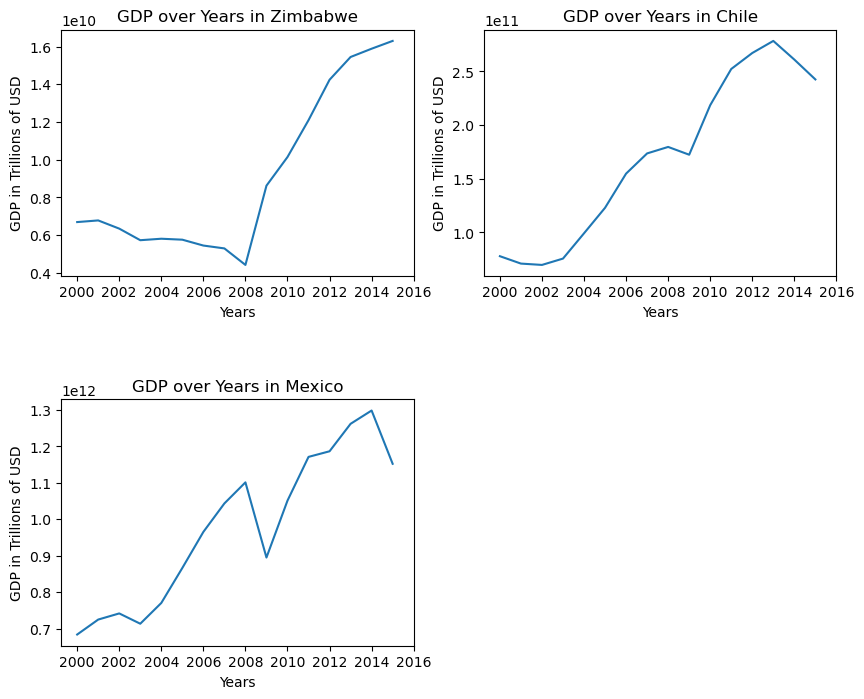

<Figure size 640x480 with 0 Axes>

In [81]:
# zooming on GDP lines of Zimbabwe, Chile and Mexico
# creating labels for axis years
year_labels=['2000', '2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016']
# creating figure
plt.figure(figsize=(10,8))

#plotting Zimbabwe's GDP
ax=plt.subplot(2, 2, 1)
gdp_year_country(all_data, 'Zimbabwe')
plt.title('GDP over Years in Zimbabwe')
plt.xlabel('Years')
plt.ylabel('GDP in Trillions of USD')
ax.set_xticks(range(2000,2017,2))
ax.set_xticklabels(year_labels)

# plotting Chile's GDP 
ax=plt.subplot(2, 2, 2)
gdp_year_country(all_data, 'Chile')
plt.title('GDP over Years in Chile')
plt.xlabel('Years')
plt.ylabel('GDP in Trillions of USD')
ax.set_xticks(range(2000,2017,2))
ax.set_xticklabels(year_labels)

# plotting Mexico's GDP
ax=plt.subplot(2, 2, 3)
gdp_year_country(all_data, 'Mexico')
plt.title('GDP over Years in Mexico')
plt.xlabel('Years')
plt.ylabel('GDP in Trillions of USD')
ax.set_xticks(range(2000,2017,2))
ax.set_xticklabels(year_labels)


plt.subplots_adjust(hspace=.5)

plt.show()
plt.clf()

There is an obvious increase in GDP numbers in every country. Let's explore the life expectancy.

### Life Expectancy over Years in Each Country ###

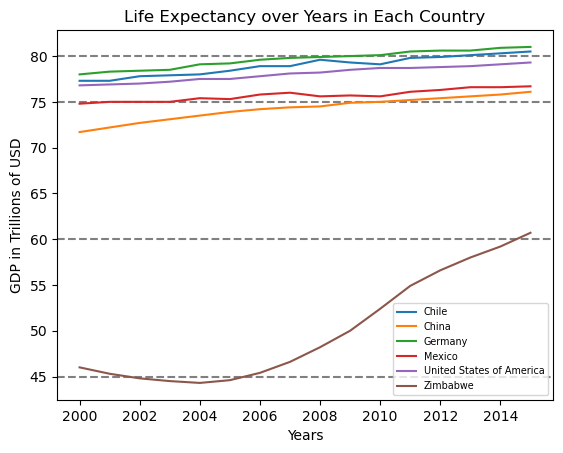

<Figure size 640x480 with 0 Axes>

In [82]:
# life expectancy over years in each country
# function for plotting
def le_year_country(data, country):
    country_data=data[data['Country']== country]
    country_plot= plt.plot(country_data['Year'], country_data['Life_expectancy'], label=country)
    return country_plot

# scale lines
plt.axhline(45, linestyle='--', color='grey')
plt.axhline(60, linestyle='--', color='grey')
plt.axhline(75, linestyle='--', color='grey')
plt.axhline(80, linestyle='--', color='grey')

# plotting countries' life expectancy
le_year_country(all_data, 'Chile')
le_year_country(all_data, 'China')
le_year_country(all_data, 'Germany')
le_year_country(all_data, 'Mexico')
le_year_country(all_data, 'United States of America')
le_year_country(all_data, 'Zimbabwe')

# legend, title, labels
plt.legend(fontsize='x-small')
plt.title('Life Expectancy over Years in Each Country')
plt.xlabel('Years')
plt.ylabel('GDP in Trillions of USD')

plt.show()
plt.clf()


At the first sight, it is very clear that Zimbabwe (where the GDP was the lowest) has also the lowest values in life expectancy. However, all in all it is increasing over the years and finally goes above 60 years (which is still very low regarding the other countries). Germany and Chiles have the highest life expectancy values. The USA (where the GDP values were the highest by far) is at the third position in this category.
The values in life expectancy have grown over the years in each country.The low values of Zimbabwe explain the skewed distribution of life expectancy.

### Life Expectancy and GDP in Each Country ###

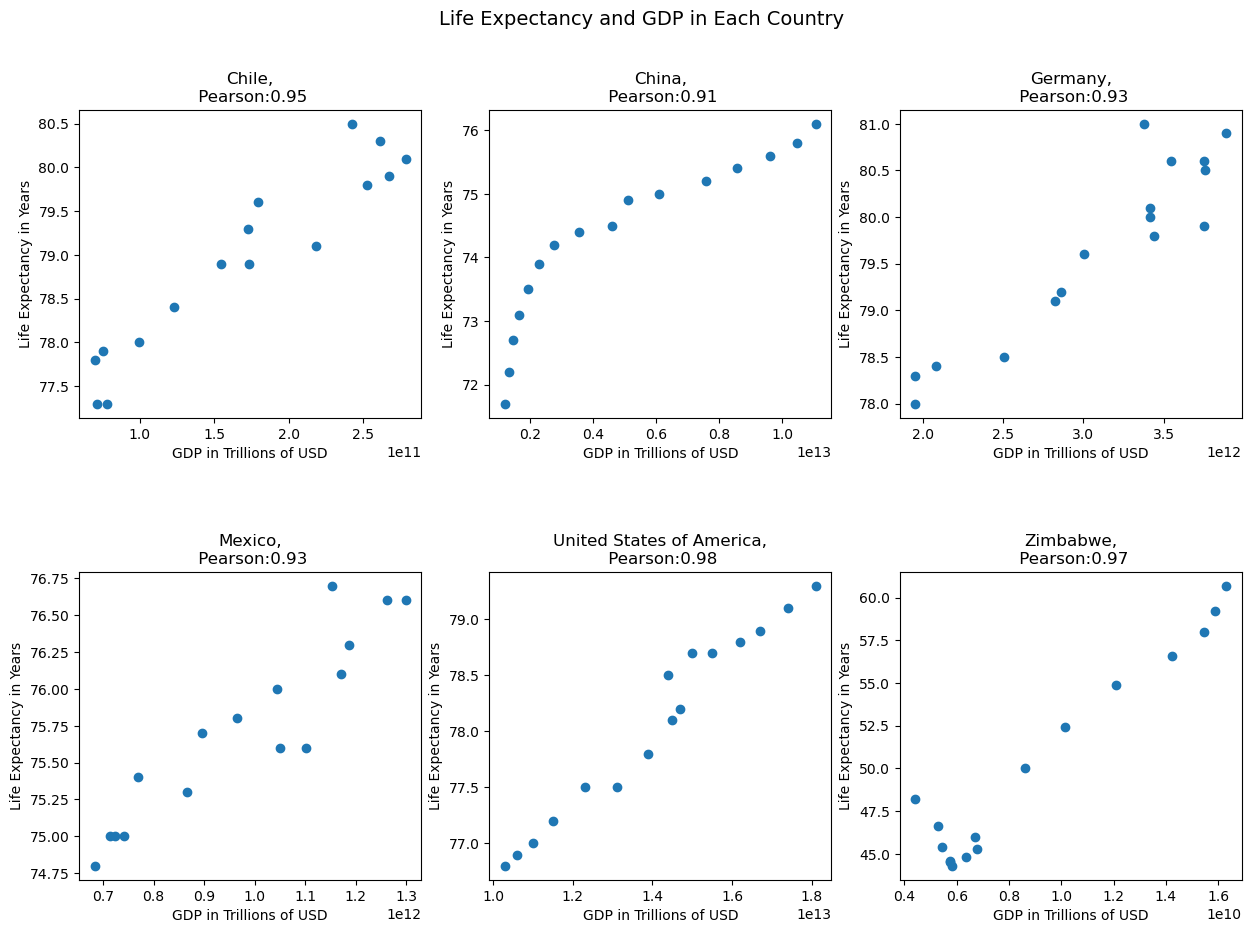

<Figure size 640x480 with 0 Axes>

In [96]:
# function for scatterplot
def le_gdp_country(data, country):
    country_data=data[data['Country']== country]
    country_statistic, pvalue=scipy.stats.pearsonr(country_data['GDP'], country_data['Life_expectancy'])
    country_plot= plt.scatter(country_data['GDP'], country_data['Life_expectancy'])
    plt.xlabel('GDP in Trillions of USD')
    plt.ylabel('Life Expectancy in Years')
    plt.title(f'{country},\n Pearson:{round(country_statistic, 2)}', fontsize=12)
    return country_plot

# plotting each country
fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle('Life Expectancy and GDP in Each Country', fontsize=14)


plt.subplot(2,3,1)
le_gdp_country(all_data, 'Chile')

plt.subplot(2,3,2)
le_gdp_country(all_data, 'China')

plt.subplot(2,3,3)
le_gdp_country(all_data, 'Germany')

plt.subplot(2,3,4)
le_gdp_country(all_data, 'Mexico')

plt.subplot(2,3,5)
le_gdp_country(all_data, 'United States of America')

plt.subplot(2,3,6)
le_gdp_country(all_data, 'Zimbabwe')

plt.subplots_adjust(hspace=.5)
plt.show()
plt.clf()

The scatter plots show that in all country there is a strong positive correlation between GDP and life expectancy. The Pearson-correlation coefficient value is everywhere over 0.9, even in Zimbabwe, where life expectancy values were the lowest. 
There seems to be a strong correlation between GDP and life expectancy. However, GDP is not the only factor which determines life expectancy. For example, Chile has the second best values in life expectancy and the second worst in GDP. China has the second best GDP and the second worst life expectancy. 

### Relation between Years, Life Expectancy and GDP ###

It is not useful to plot the data of year, GDP and life expectancy in a scatter plot, because the spread of the values of both GDP and life expectancy is quiet large. 

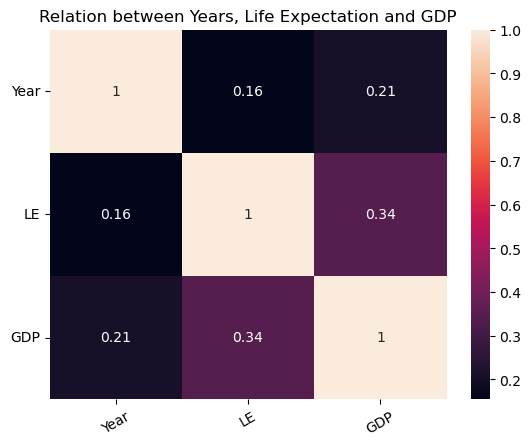

<Figure size 640x480 with 0 Axes>

In [137]:
# heatmap for all_data
ax=sns.heatmap(data=all_data.corr(), annot=True)
ax.set_xticklabels(['Year', 'LE', 'GDP'], rotation=30)
ax.set_yticklabels(['Year', 'LE', 'GDP'], rotation=360)
plt.title('Relation between Years, Life Expectation and GDP')
plt.show()
plt.clf()

The heatmap shows that the correlation between GDP  and life expectancy is only 0.34 which is essentially lower than the above calculated correlation coefficient numbers. The variable year shows a weak relation with both GDP and life expectancy.The reason can be the huge spread of both variables GDP and life expectancy. 

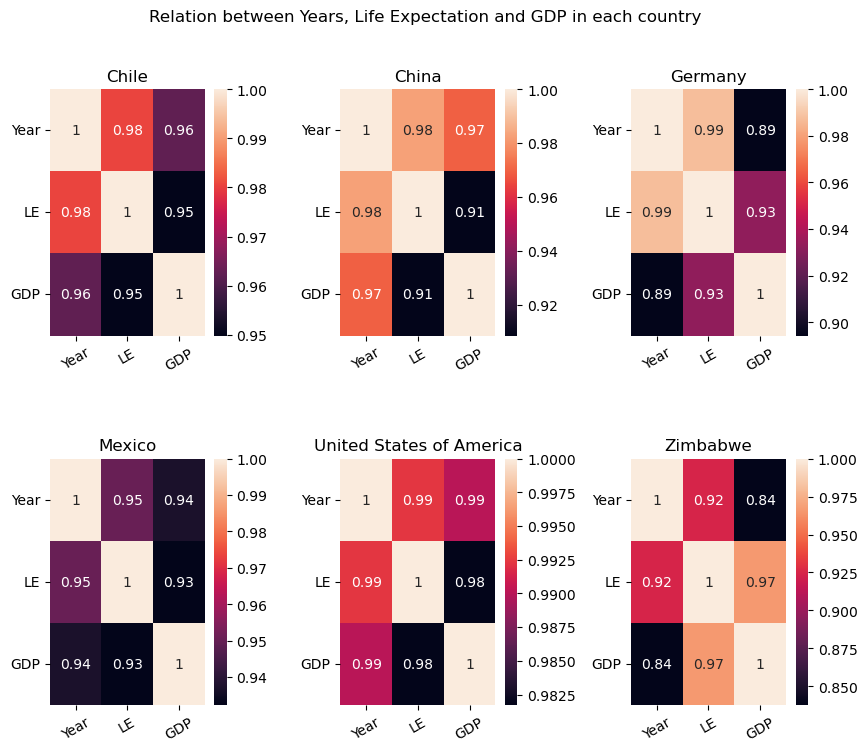

<Figure size 640x480 with 0 Axes>

In [139]:
# heatmap for each country
def heatmap_corr(data, country):
    country_data=data[data['Country']== country]
    ax=sns.heatmap(data=country_data.corr(), annot=True)
    plt.title(country)
    ax.set_xticklabels(['Year', 'LE', 'GDP'], rotation=30)
    ax.set_yticklabels(['Year', 'LE', 'GDP'], rotation=360)
    return ax

plt.figure(figsize=(10,8))
plt.suptitle('Relation between Years, Life Expectation and GDP in each country')
plt.subplot(2,3,1)
heatmap_corr(all_data, 'Chile')

plt.subplot(2,3,2)
heatmap_corr(all_data, 'China')

plt.subplot(2,3,3)
heatmap_corr(all_data, 'Germany')

plt.subplot(2,3,4)
heatmap_corr(all_data, 'Mexico')

plt.subplot(2,3,5)
heatmap_corr(all_data, 'United States of America')

plt.subplot(2,3,6)
heatmap_corr(all_data, 'Zimbabwe')

plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()
plt.clf()

If we observe the heatmaps for each country, we can see again the large Pearson-correlation numbers between GDP and life expectancy. There is a strong linear relation between years and GDP, moreover years and life expectancy as well.